In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [3]:
import sys
sys.path.insert(0,'../..')
import omama as O
import pickle
from hyperopt import hp, rand, fmin, Trials
from pyod.models.cblof import CBLOF

In [4]:
# load data and labels

with open('/raid/mpsych/datasetB.pkl','rb') as f:
    datasetA = pickle.load(f)
    
with open('/raid/mpsych/datasetB_labels.pkl', 'rb') as f1:
    labels = np.asarray(pickle.load(f1))

In [5]:
# determine the hyperparameter space

param_grid = {
    'contamination': hp.uniform('contamination', 0.07, .1),
    'alpha': hp.uniform('alpha', 0.5, 1.0),
    'beta': hp.uniform('beta', 1.0, 5.0),
    'use_weights': hp.choice('use_weights', [True, False]),
    'n_jobs': hp.uniformint('n_jobs', 1, 4),
}

In [5]:
# def opt(params):
#     param_dict = {
#         'contamination': params['contamination'],
#         'n_clusters': int(params['n_clusters']),
#         'alpha': params['alpha'],
#         'beta': params['beta'],
#         'use_weights': params['use_weights'],
#         'check_estimator': params['check_estimator'],
#         'n_jobs': int(params['n_jobs']),
#         'clustering_estimator': params['clustering_estimator'],
#     }
#     clf = self.algorithm(**params)
#     clf.fit(self.X_train, self.y_train)
    
#     score = -cross_val_score(clf,
#                              self.X_train,
#                              self.y_train,
#                              cv=self.cv,
#                              n_jobs=self.n_jobs,
#                              scoring=self.scoring).mean()

In [6]:
hyperOpt = O.HyperTuner(
    algorithm=CBLOF,
    param_space=param_grid,
    feature_type='hist',
    norm_type='gaussian',
    data=datasetA,
    gt_labels=labels,
    max_evals=60,
    sigma=5
)

HyperTuner initializing, please be patient...


 13%|███████████████████▋                                                                                                                                | 8/60 [00:04<00:19,  2.63trial/s, best loss: -0.775]

job exception: Could not form valid cluster separation. Please change n_clusters or change clustering method



 27%|███████████████████████████████████████▏                                                                                                           | 16/60 [00:02<00:14,  3.01trial/s, best loss: -0.775]

job exception: Could not form valid cluster separation. Please change n_clusters or change clustering method



 35%|███████████████████████████████████████████████████▍                                                                                               | 21/60 [00:01<00:12,  3.02trial/s, best loss: -0.775]

job exception: Could not form valid cluster separation. Please change n_clusters or change clustering method



 43%|███████████████████████████████████████████████████████████████▋                                                                                   | 26/60 [00:01<00:12,  2.79trial/s, best loss: -0.775]

job exception: Could not form valid cluster separation. Please change n_clusters or change clustering method



 57%|███████████████████████████████████████████████████████████████████████████████████▎                                                               | 34/60 [00:02<00:08,  3.00trial/s, best loss: -0.775]

job exception: Could not form valid cluster separation. Please change n_clusters or change clustering method



 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 42/60 [00:02<00:05,  3.02trial/s, best loss: -0.775]

job exception: Could not form valid cluster separation. Please change n_clusters or change clustering method



 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 47/60 [00:01<00:04,  2.96trial/s, best loss: -0.775]

job exception: Could not form valid cluster separation. Please change n_clusters or change clustering method



 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 55/60 [00:02<00:01,  3.10trial/s, best loss: -0.775]

job exception: Could not form valid cluster separation. Please change n_clusters or change clustering method



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:01<00:00,  2.72trial/s, best loss: -0.775]
Best parameters:
alpha: 0.7531054068679127
beta: 4.477423665141224
contamination: 0.07245240825856468
n_jobs: 4.0
use_weights: False


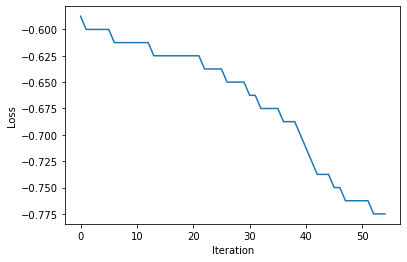

In [7]:
hyperOpt.optimize()

In [8]:
hyperOpt.display_best_params()

Best parameters:
alpha: 0.7531054068679127
beta: 4.477423665141224
contamination: 0.07245240825856468
n_jobs: 4.0
use_weights: False


In [9]:
hyperOpt.print_param_space()

Parameter space:
contamination: ['0.07', '0.1']
alpha: ['0.5', '1.0']
beta: ['1.0', '5.0']
use_weights: ['True', 'False']
n_jobs: ['1', '4', '1.0']


In [10]:
print(type(hyperOpt.param_space))

<class 'dict'>
